In [1]:
import pandas as pd #To hand with data 

In [2]:
import numpy as np #To math 
import seaborn as sns #to visualization
import matplotlib.pyplot as plt # to plot the graphs
import matplotlib.gridspec as gridspec # to do the grid of plots

In [3]:
data = pd.read_csv(r"C:\Users\Aditya kumar Dubey\OneDrive\Apps\Documents\Desktop\Data\creditcard.csv")

In [4]:
data.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
171732,120790.0,-0.557831,-0.451850,0.629543,-2.551381,0.759974,-0.868874,0.104151,-0.309379,-3.006699,...,-0.322848,-0.698348,-0.370144,-1.008341,0.758511,-0.047818,0.007216,0.049704,4.88,0
104833,69248.0,-1.292012,0.369346,2.564285,0.197441,0.409677,-0.141063,-0.008248,0.136042,0.223685,...,-0.038122,0.032098,-0.435011,-0.087638,0.506518,-0.473427,0.014011,0.071720,9.99,0
113789,73205.0,-3.662679,-3.167844,0.855221,0.917950,2.363190,-2.043194,-0.401162,0.209864,-0.028400,...,-0.506122,-0.461573,3.241036,-0.166212,0.615237,0.211689,0.591307,-0.305437,0.99,0
182188,125298.0,-1.061286,0.839204,0.820339,-0.689321,1.159375,-0.434323,1.136861,-0.346647,-0.120400,...,-0.171203,-0.287348,-0.560240,0.545360,0.575717,0.493531,-0.360021,-0.181429,53.43,0
75212,55955.0,-0.944500,0.849184,0.482726,0.823275,-0.727705,0.016680,0.902137,0.371822,-0.775509,...,0.203176,0.428583,0.134044,-0.027425,-0.226034,-0.327177,-0.010454,0.022464,176.00,0


In [5]:
data.shape

(284807, 31)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# The data is stardarized, I will explore them later
#For now I will look the "normal" columns
data[['Time', 'Amount', 'Class']].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


In [8]:
print("Diffrence of Normal(0) & Frauds(1):")
count = data['Class'].value_counts()
count

Diffrence of Normal(0) & Frauds(1):


Class
0    284315
1       492
Name: count, dtype: int64

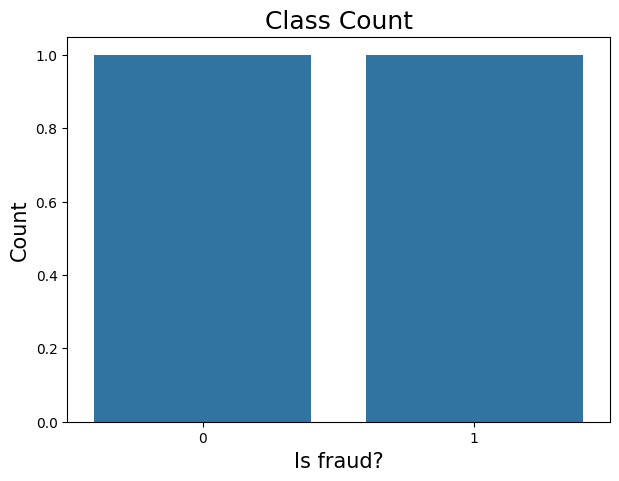

In [9]:
plt.figure(figsize=(7,5))
plt.(count)
plt.title("Class Count", fontsize=18)
plt.xlabel("Is fraud?", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

we have clearly imbalanced data
it's very common when treating of frauds...

First I will do some explore through the Time and Amount.
Second I will explore the V's Features, that are PCA's

# Time Features and some Feature Engineering
As our TIme feature are in second we will transform it to minuts and hours to get a batter undestand of the patterns

In [10]:
timedelta = pd.to_timedelta(data['Time'], unit = 's')
data['Time_min'] = (timedelta.dt.components.minutes).astype(int)
data['Time_hour'] = (timedelta.dt.components.hours).astype(int)
data.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Time_min,Time_hour
17121,28454.0,-2.888712,2.155079,1.909446,2.608167,-0.421991,2.690399,-2.495283,-4.783773,-0.625104,...,0.380364,-0.311430,-0.095566,0.319917,-0.462248,-0.314306,1.00,0,54,7
245038,152582.0,1.936382,-0.699455,-0.507631,0.151918,-0.724521,-0.169757,-0.761043,0.123746,1.723776,...,0.161126,0.678256,-0.218877,0.099143,-0.001069,-0.033501,39.95,0,23,18
55621,47038.0,1.333516,0.232075,-1.708534,-0.070691,2.556841,3.062609,-0.033861,0.647438,-0.400604,...,-0.179801,1.009996,1.009941,-0.280494,-0.005883,0.003857,1.00,0,3,13
147579,88706.0,2.025547,0.148705,-1.718591,0.552925,0.115826,-1.530672,0.281599,-0.389034,0.620863,...,-0.030895,-0.022412,0.239006,-0.105007,-0.006765,-0.028691,19.48,0,38,0
136038,81517.0,-0.434612,-0.061949,1.631615,-1.712048,-0.182618,-0.653508,0.261913,-0.360573,-0.978270,...,-0.102667,-0.082673,-0.635581,0.765705,-0.189649,-0.082219,24.71,0,38,22


In [11]:
timedelta[100:110]

100   0 days 00:01:08
101   0 days 00:01:08
102   0 days 00:01:09
103   0 days 00:01:09
104   0 days 00:01:09
105   0 days 00:01:09
106   0 days 00:01:10
107   0 days 00:01:11
108   0 days 00:01:13
109   0 days 00:01:13
Name: Time, dtype: timedelta64[ns]

C:\Users\Aditya kumar Dubey\AppData\Local\Temp\ipykernel_13000\4108236109.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Class'] == 0]["Time_hour"],
C:\Users\Aditya kumar Dubey\AppData\Local\Temp\ipykernel_13000\4108236109.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[

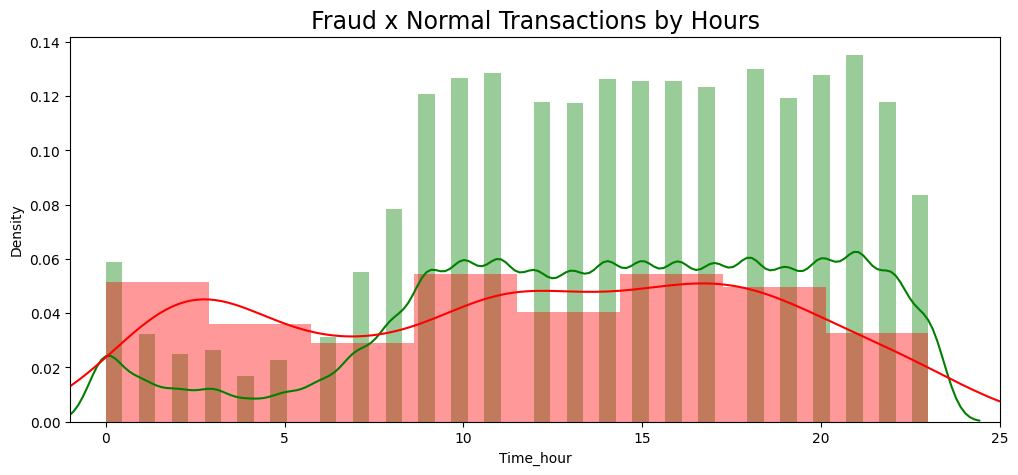

In [12]:
#Exploring the distribuition by Class types throught hours and minutes
plt.figure(figsize=(12,5))
sns.distplot(data[data['Class'] == 0]["Time_hour"], 
             color='g')
sns.distplot(data[data['Class'] == 1]["Time_hour"], 
             color='r')
plt.title('Fraud x Normal Transactions by Hours', fontsize=17)
plt.xlim([-1,25])
plt.show()

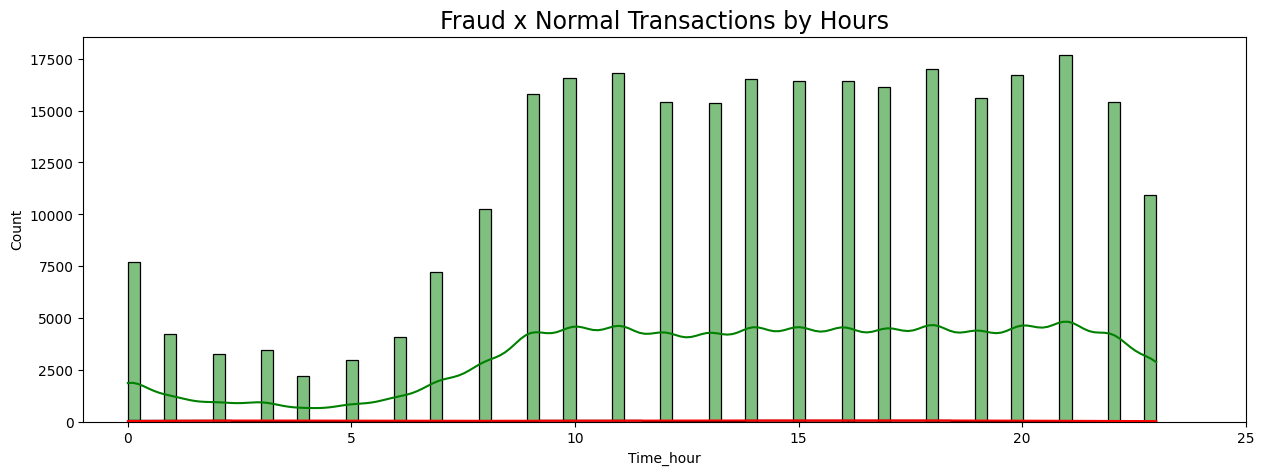

In [13]:
plt.figure(figsize=(15,5))
sns.histplot(data[data['Class'] == 0]["Time_hour"],kde = True ,
             color='g')
sns.histplot(data[data['Class'] == 1]["Time_hour"], kde = True ,
             color='r')
plt.title('Fraud x Normal Transactions by Hours', fontsize=17)
plt.xlim([-1,25])
plt.show()

<Axes: xlabel='Time_hour', ylabel='Count'>

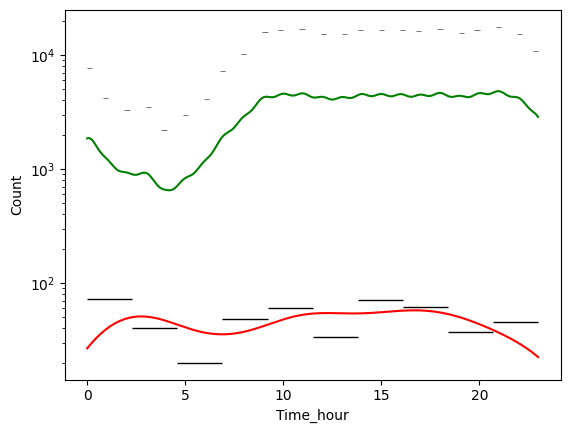

In [14]:
sns.histplot(data[data['Class'] == 0]["Time_hour"], kde=True, color='g', alpha=0.5)
sns.histplot(data[data['Class'] == 1]["Time_hour"], kde=True, color='r', alpha=0.7, log_scale=(False, True))


C:\Users\Aditya kumar Dubey\AppData\Local\Temp\ipykernel_13000\2082439618.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Class'] == 0]["Time_min"], color='g')
C:\Users\Aditya kumar Dubey\AppData\Local\Temp\ipykernel_13000\2082439618.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dist

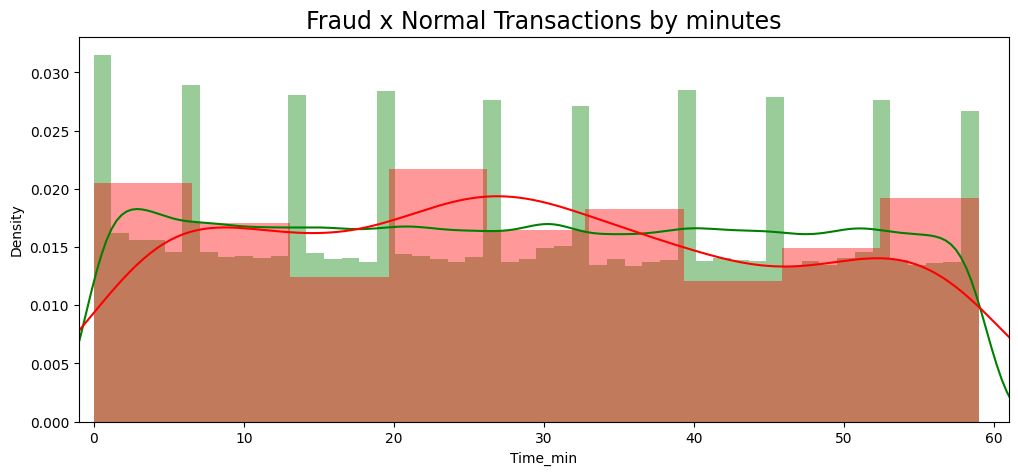

In [15]:
#Exploring the distribuition by Class types throught hours and minutes
plt.figure(figsize=(12,5))
sns.distplot(data[data['Class'] == 0]["Time_min"], color='g')
sns.distplot(data[data['Class'] == 1]["Time_min"], color='r')
plt.title('Fraud x Normal Transactions by minutes', fontsize=17)
plt.xlim([-1,61])
plt.show()

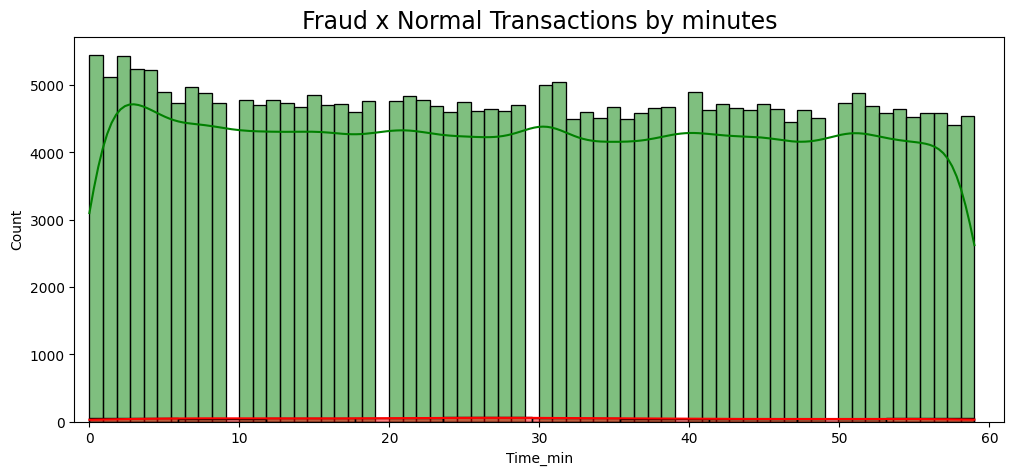

In [16]:
plt.figure(figsize=(12,5))
sns.histplot(data[data['Class'] == 0]["Time_min"], kde = True, color='g',)
sns.histplot(data[data['Class'] == 1]["Time_min"], kde = True, color='r')
plt.title('Fraud x Normal Transactions by minutes', fontsize=17)
plt.xlim([-1,61])
plt.show()

Interesting distribution , but don't sounds like a clear pattern of acction

# Looking the statistics of our Amount class frauds and normal transactions 

In [17]:
# To clear the data of fraud and on frauds
df_fraud = data[data['Class'] == 1]
df_normal = data[data['Class'] == 0]

print('Fraud transaction statistics\n')
print(df_fraud['Amount'].describe())
print('\nNormal transaction statistics\n')
print(df_normal['Amount'].describe())

Fraud transaction statistics

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Normal transaction statistics

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


Interesting.

Using this informations I will filter the values to look for Amount by Class
I will filter the "normal" amounts by 3.000

In [18]:
#Feature engineering to a better visualization of the values
data['Amount_log'] = np.log(data.Amount + 0.01)

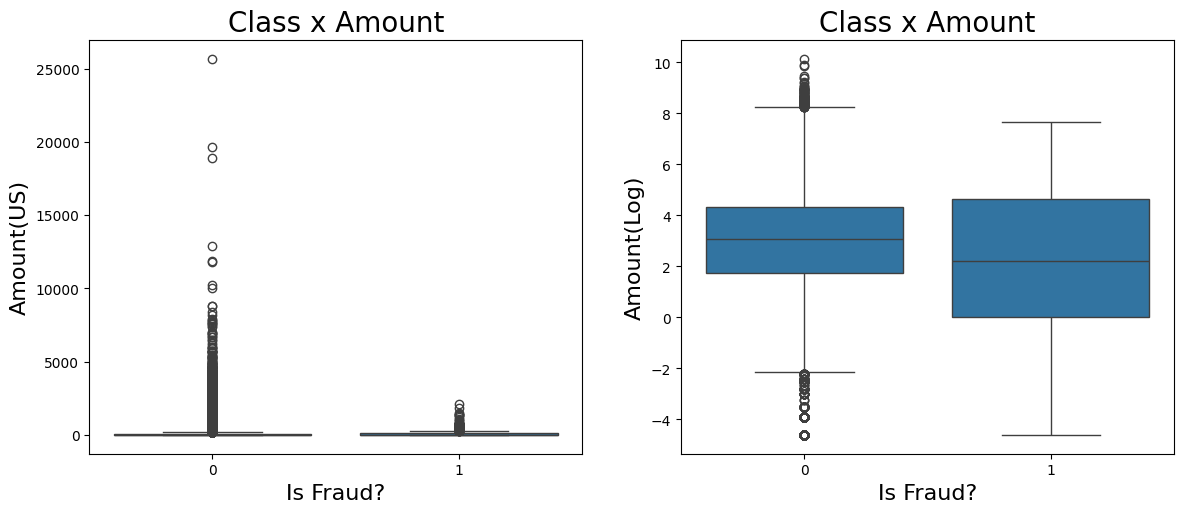

In [19]:
plt.figure(figsize=(14,6))
#I will explore the Amount by Class and see the distribuition of Amount transactions
plt.subplot(121)
ax = sns.boxplot(x ="Class",y="Amount",
                 data=data)
ax.set_title("Class x Amount", fontsize=20)
ax.set_xlabel("Is Fraud?", fontsize=16)
ax.set_ylabel("Amount(US)", fontsize = 16)

plt.subplot(122)
ax1 = sns.boxplot(x ="Class",y="Amount_log", data=data)
ax1.set_title("Class x Amount", fontsize=20)
ax1.set_xlabel("Is Fraud?", fontsize=16)
ax1.set_ylabel("Amount(Log)", fontsize = 16)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()


We Can see a slightly difference in log amount of our two Classes.

The IQR of fraudulent transactions are higher the normal transcations, but normal transaction have values 

# Looking the Amount and time distribuition of FRAUD transactions

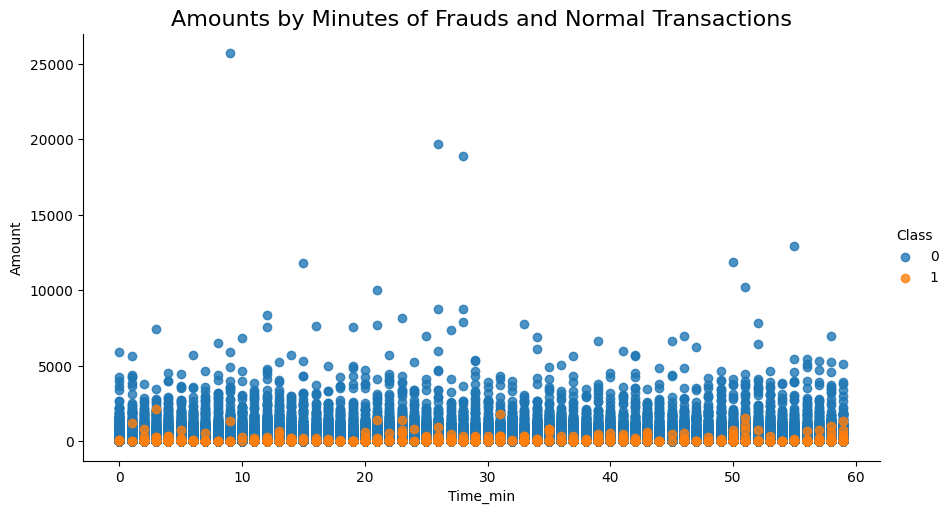

In [20]:
# sns.lmplot :- Plot data and regression model fits across a FacetGrid.

sns.lmplot(y="Amount", x="Time_min", fit_reg=False,aspect=1.8,
                data=data, hue='Class')
plt.title("Amounts by Minutes of Frauds and Normal Transactions",fontsize=16)
plt.show()

# Looking a scatter plot of the Time_hours diatribution by amount

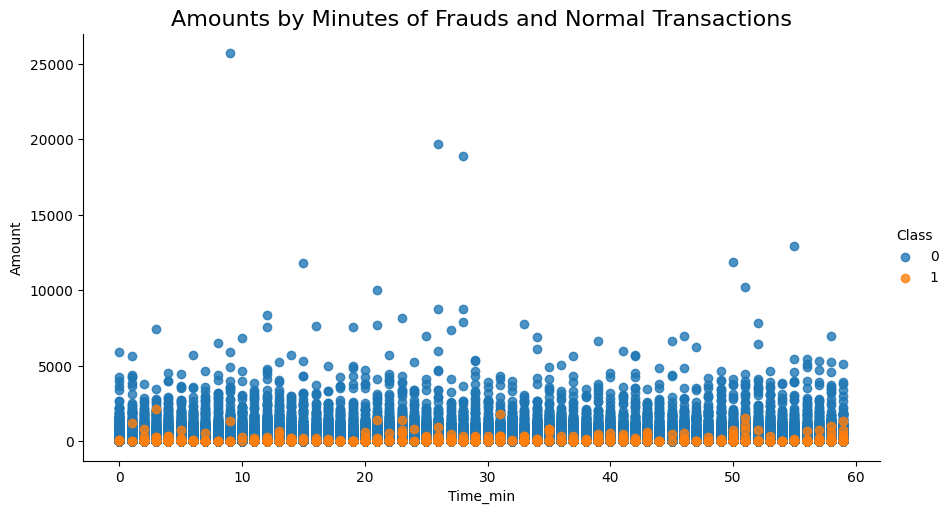

In [21]:
sns.lmplot(y="Amount", x="Time_min", fit_reg=False,aspect=1.8,
                data=data, hue='Class')
plt.title("Amounts by Minutes of Frauds and Normal Transactions",fontsize=16)
plt.show()

In [22]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,Class,Time_min,Time_hour,Amount_log
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,0,5.008166
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,0,0.993252
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,0,5.936665
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,0,4.816322
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,0,4.248495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,59,23,-0.248461
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,59,23,3.210844
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,59,23,4.217889
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,59,23,2.303585


# I will use boxplot to search differents distribuitions:
We are searching for features that diverges from normal distribuition

In [23]:
print(data.shape)
print(data.columns)

(284807, 34)
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Time_min', 'Time_hour', 'Amount_log'],
      dtype='object')


C:\Users\Aditya kumar Dubey\AppData\Local\Temp\ipykernel_13000\1919657252.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col][frauds], bins = 50, color = 'g') #Will receive the "semi-salmon" violin
C:\Users\Aditya kumar Dubey\AppData\Local\Temp\ipykernel_13000\1919657252.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed

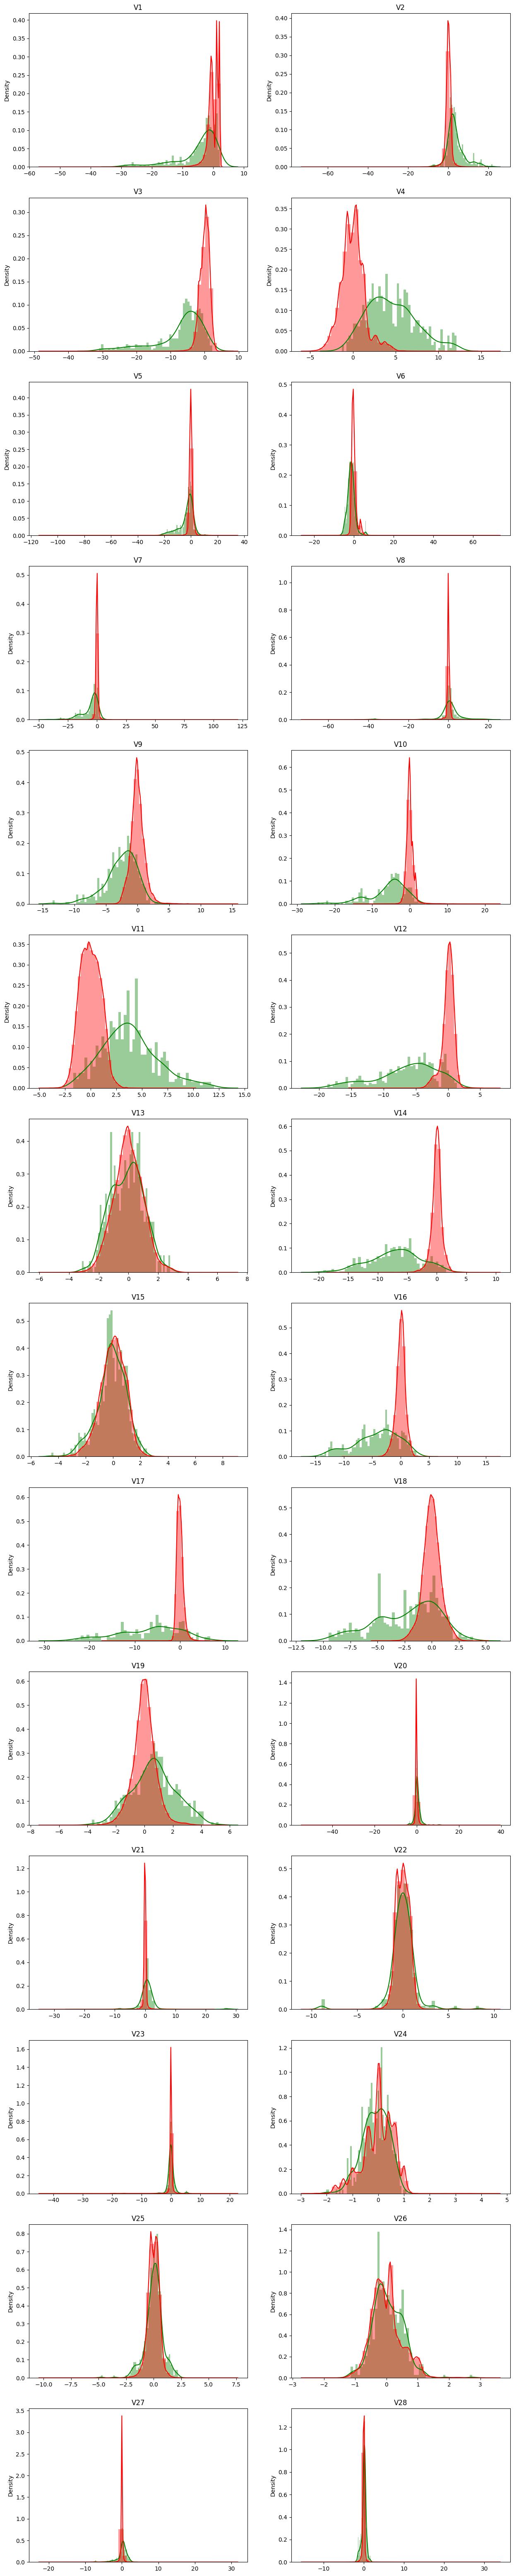

In [24]:
# Looking the V's features
columns = data.iloc[:,1:29].columns

frauds = data.Class == 1
normal = data.Class ==0

grid = gridspec.GridSpec(14,2)
plt.figure(figsize=(15,20*4))

for n, col in enumerate(data[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(data[col][frauds], bins = 50, color = 'g') #Will receive the "semi-salmon" violin
    sns.distplot(data[col][normal], bins = 50, color = 'r')#Will receive the "ocean" color
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
plt.show()
    

We can see a interesting different distribuition in some of our features like V4, V9, V16, V17 and a lot more.

Now let's take a look on time distribuition

#  Diffrencs in time

# Feature seletions

In [25]:
#I will select the variables where fraud class have a interesting behavior and might can help us predict

data = data[["Time_hour","Time_min","V2","V3","V4","V9","V10","V11","V12","V14","V16","V17","V18","V19","V27","Amount","Class"]]

#### Some Feature Engineering

In [26]:
#I will select the variables where fraud class have a]] interesting behavior and might can help us predict

data.Amount = np.log(data.Amount + 0.001)

C:\Users\Aditya kumar Dubey\AppData\Local\Temp\ipykernel_13000\1653656769.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Amount = np.log(data.Amount + 0.001)


In [27]:
data['Amount'].iloc[85886]

-6.907755278982137

In [28]:
np.log(0+0.001)

-6.907755278982137

In [29]:
#Looking the final data
data.head()

,Time_hour,Time_min,V2,V3,V4,V9,V10,V11,V12,V14,V16,V17,V18,V19,V27,Amount,Class
0,0,0,-0.072781,2.536347,1.378155,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,0.133558,5.008105,0
1,0,0,0.266151,0.166480,0.448154,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.008983,0.989913,0
2,0,0,-1.340163,1.773209,0.379780,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,-0.055353,5.936641,0
3,0,0,-0.185226,1.792993,-0.863291,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,0.062723,4.816249,0
4,0,0,0.877737,1.548718,0.403034,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,0.219422,4.248367,0


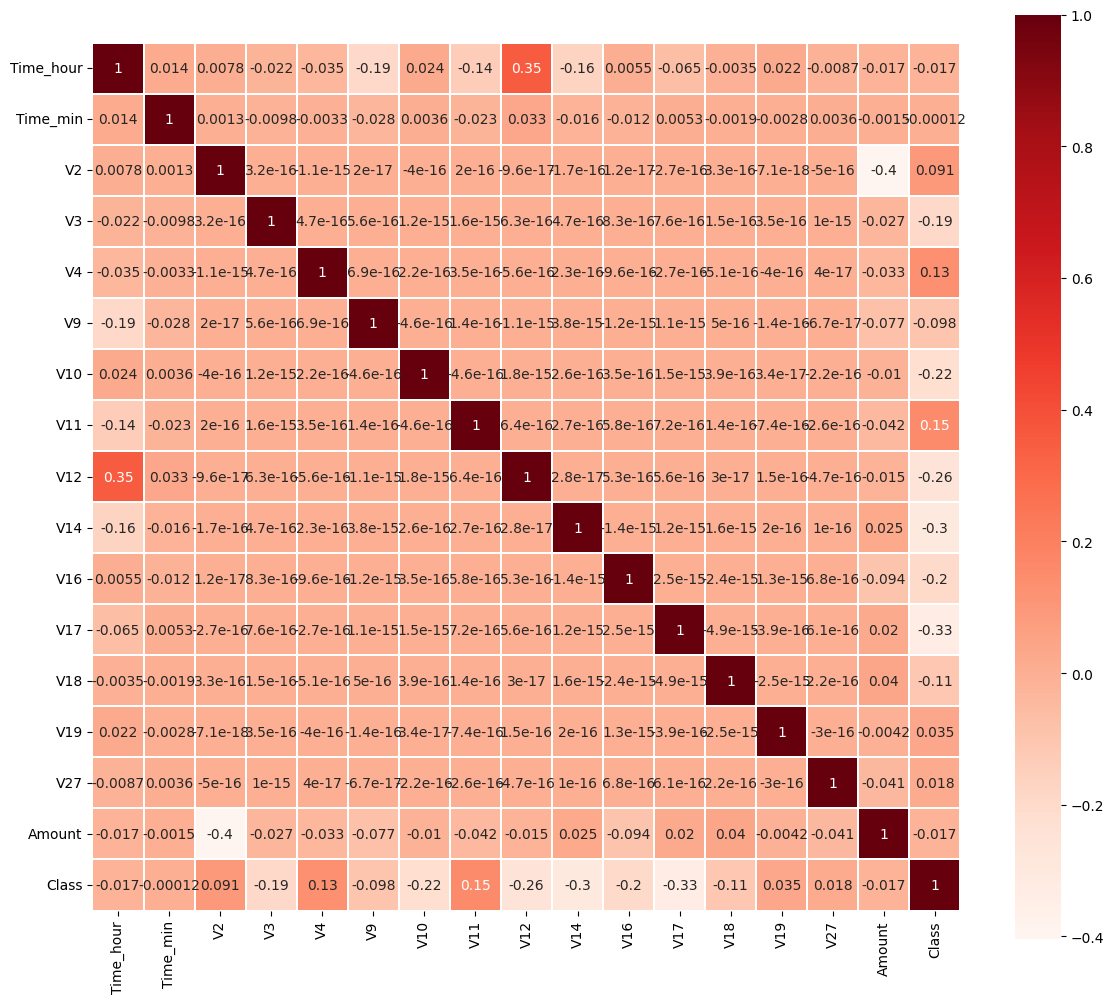

In [30]:
colormap = plt.cm.Reds

plt.figure(figsize=(14,12))

sns.heatmap(data.corr(), linewidths = 0.1, vmax=1.0,
            square=True, cmap = colormap, linecolor = 'white', annot = True)
plt.show()

In [31]:
! pip install imblearn

# Preprocessing

In [32]:
from imblearn.pipeline import make_pipeline as make_pipeline_imb

# to do our transformation in a unique time
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

from sklearn.model_selection import train_test_split
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_score, recall_score, fbeta_score, confusion_matrix, precision_recall_curve, accuracy_score

In [33]:
X = data.drop(['Class'], axis = 1).values #Setting the X to do the split
y = data['Class'].values # transforming the values in array

In [34]:
X.shape

(284807, 16)

In [35]:
X[0]

array([ 0.        ,  0.        , -0.07278117,  2.53634674,  1.37815522,
        0.36378697,  0.09079417, -0.55159953, -0.61780086, -0.31116935,
       -0.47040053,  0.20797124,  0.02579058,  0.40399296,  0.13355838,
        5.00810543])

In [36]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
# the function that we will use to batter evaluate the model
def print_results(headline, true_value, pred):
    print(headline)
    print("accuracy: {}".format(accuracy_score(true_value,pred)))
    print("precision: {}".format(precision_score(true_value,pred)))
    print("recall: {}".format(recall_score(true_value,pred)))
    print("f2: {}".format(fbeta_score(true_value,pred, beta=2)))

In [38]:
#splitting data into training adn test set 
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=2)

In [39]:
classifier = RandomForestClassifier

#### Working with imbalanced data 

In [40]:
# build model with SMOte imblearn
smote_pipeline = make_pipeline_imb(SMOTE(random_state=4), classifier(random_state=42))

smote_model = smote_pipeline.fit(X_train,y_train)
smote_prediction = smote_model.predict(X_test)

In [41]:
smote_prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
#Showing the diference before and after the transformation used
print("normal data distribution: {}".format(Counter(y)))
X_smote, y_smote = SMOTE().fit_resample(X, y)
print("SMOTE data distribution: {}".format(Counter(y_smote)))

normal data distribution: Counter({0: 284315, 1: 492})
SMOTE data distribution: Counter({0: 284315, 1: 284315})


### Evaluating the model SMOTE + Random Forest

In [43]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test, smote_prediction))

print('\nSMOTE Pipeline Score: {} '.format(smote_pipeline.score(X_test, y_test)))

print_results('\nSMOTE + RandomForest classification', y_test, smote_prediction)

Confusion Matrix: 
[[56867    11]
 [   12    72]]

SMOTE Pipeline Score: 0.9995962220427653 

SMOTE + RandomForest classification
accuracy: 0.9995962220427653
precision: 0.8674698795180723
recall: 0.8571428571428571
f2: 0.8591885441527446


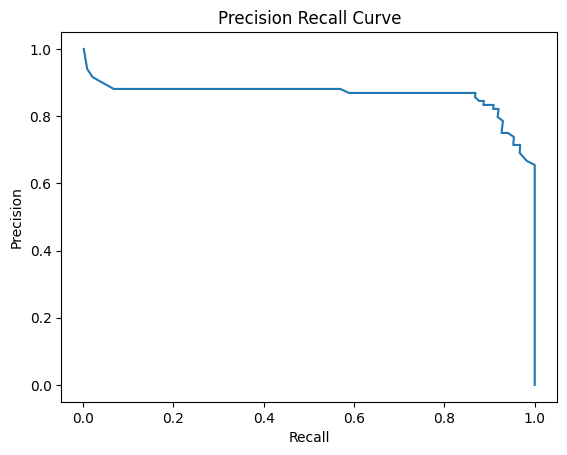

In [44]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = smote_pipeline.predict_proba(X_test)[:,1]

# Generate precision recall curve values: precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

### This ROC Curve is a overfitted curve, so how can I fix this problem and get a correc

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV

In [46]:
#parameters for the model
param_grid = {"max_depth": [3,5, None],
              "n_estimators":[3,5,10],
              "max_features": [5,6,7,8]}

# Creating the classifier
model = RandomForestClassifier(max_features=3, max_depth=2 ,n_estimators=10, random_state=3, criterion='entropy', n_jobs=1, verbose=1 )
#model.fit(X_train,y_train)
#accuracy_score(y_test,model.predict(X_test))

In [47]:
grid = GridSearchCV(model, param_grid = param_grid, scoring='recall',cv = 5)

In [48]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy', max_depth=2,
                                              max_features=3, n_estimators=10,
                                              n_jobs=1, random_state=3,
                                              verbose=1),
             param_grid={'max_depth': [3, 5, None],
                         'max_features': [5, 6, 7, 8],
                         'n_estimators': [3, 5, 10]},
             scoring='recall')

In [54]:
print(grid.best_estimator_)

print('\n',grid.best_params_)

print('\n', grid.best_score_)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features=7,
                       n_estimators=5, n_jobs=1, random_state=3, verbose=1)

 {'max_depth': 5, 'max_features': 7, 'n_estimators': 5}

 0.7841915085817526


In [55]:
# Running the fit
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [56]:
# Printing the Training Score
print("Training score data: ")
print(rf.score(X_train, y_train))

Training score data: 
1.0


In [57]:
#Testing the model 
#Predicting by X_test
y_pred = rf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print_results("RF classification", y_test, y_pred)

[[56874     4]
 [   16    68]]
RF classification
accuracy: 0.9996488887328394
precision: 0.9444444444444444
recall: 0.8095238095238095
f2: 0.8333333333333334


#### Feature importance plot¶

C:\Users\Aditya kumar Dubey\AppData\Local\Temp\ipykernel_13000\1683525217.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(),rotation=90)


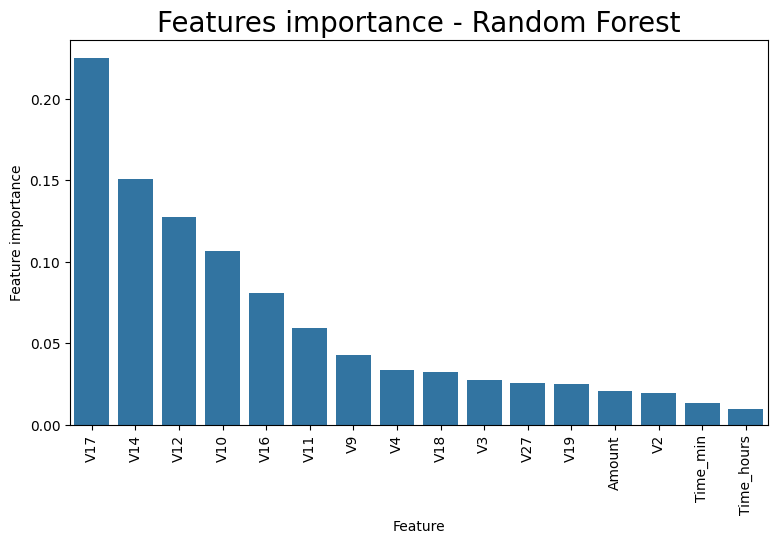

In [58]:
features = ["Time_min", 'Time_hours',"V2","V3","V4","V9","V10","V11","V12","V14","V16","V17","V18","V19","V27","Amount"]

# Credits to Gabriel Preda
# https://www.kaggle.com/gpreda/credit-card-fraud-detection-predictive-models
plt.figure(figsize = (9,5))

feat_import = pd.DataFrame({'Feature': features, 'Feature importance': rf.feature_importances_})
feat_import = feat_import.sort_values(by='Feature importance',ascending=False)

g = sns.barplot(x='Feature',y='Feature importance',data=feat_import)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title('Features importance - Random Forest',fontsize=20)
plt.show() 


The top 4 feature are V17, V14, V12, V10 corresponds to 75% of total.

Also the f2 score that is the median of recall and precision are on a considerably value

### ROC CURVE - Random Forest

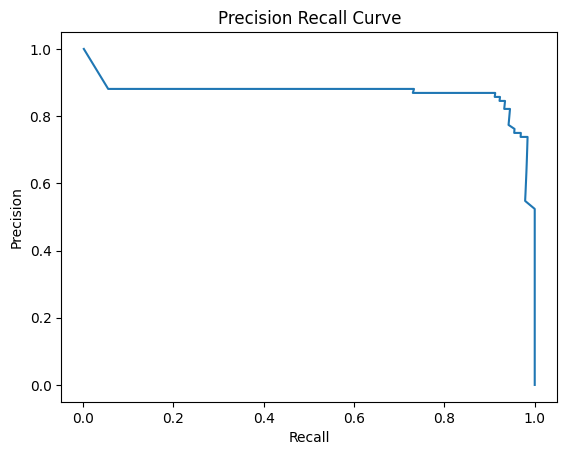

In [59]:
#Predicting proba
y_pred_prob = rf.predict_proba(X_test)[:,1]

# Generate precision recall curve values: precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

In [60]:
results = cross_val_score(rf,X_train, y_train, cv=10, scoring='recall')
results

array([0.82926829, 0.73170732, 0.7804878 , 0.68292683, 0.80487805,
       0.825     , 0.8       , 0.85365854, 0.80487805, 0.75609756])

### Modelling Logistic Regression with Hyper Parameters

In [61]:
param_grid = {'C': [0.01, 0.1, 1, 10],
             'penalty':['l1', 'l2']}

logreg = LogisticRegression(random_state=2)

grid_search_lr = GridSearchCV(logreg, param_grid=param_grid, scoring='recall', cv=5)

grid_search_lr.fit(X_train, y_train)

C:\Users\Aditya kumar Dubey\anaconda3\envs\dubey\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Aditya kumar Dubey\anaconda3\envs\dubey\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Aditya kumar Dubey\anaconda3\envs\dubey\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Aditya kumar Dubey\anaconda3\e

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=2),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']},
             scoring='recall')

In [62]:
# The best recall obtained
print(grid_search_lr.best_score_)
#Best parameter on trainning set
print(grid_search_lr.best_params_)

0.6028605841613971
{'C': 1, 'penalty': 'l2'}


In [63]:
### Setting the best parameters as parameters of our model

In [64]:
# Creating the model 
logreg = LogisticRegression(C=10, penalty='l2',random_state=2)

#Fiting the model
logreg.fit(X_train, y_train)
           
# Printing the Training Score
print("Cross Validation of X and y Train: ")
print(cross_val_score(logreg,X_train, y_train, cv=5, scoring='recall'))

Cross Validation of X and y Train: 
[0.59259259 0.58024691 0.70731707 0.59756098 0.52439024]


In [65]:
# Predicting with the best params
y_pred = logreg.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print("")
print_results("LogReg classification", y_test, y_pred)

[[56870     8]
 [   28    56]]

LogReg classification
accuracy: 0.9993679997191109
precision: 0.875
recall: 0.6666666666666666
f2: 0.7


70% of accuracy is not too bad, but we found a high vale on the Random Forest Model

## Precision Recall Curve of Logistic Regression

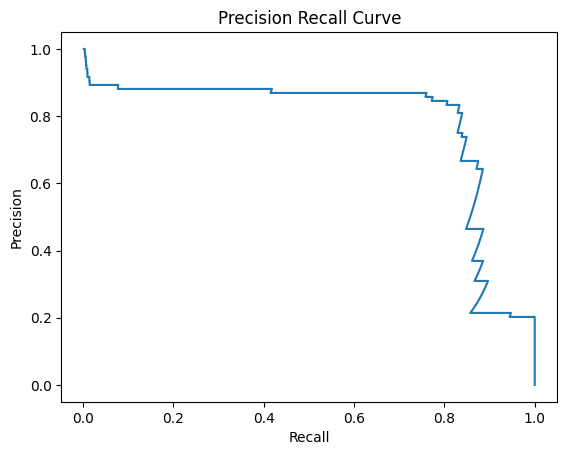

In [66]:
#Predicting proba
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate precision recall curve values: precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()


# CONCLUSION:
The highest values of Normal transactions are 25691.16 while of Fraudulent transactions are just 2125.87.
The average value of normal transactions are small(USD 88.29) than fraudulent transactions that is USD 122.21

We got the best score when we use the SMOTE (OverSampling) + RandomForest, that performed a f2 score of 0.8669~

This is a considerably difference by the second best model that is 0.8252 that uses just RandomForests with some Hyper Parameters.

The worst model was Logreg where I used GridSearchCV to get the Best params to fit and predict where the recall was ~0.6666 and f2 ~0.70.